### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

---

In [1]:
%%capture
import json
import os
import nest_asyncio
from dotenv import load_dotenv
from IPython.display import Markdown, display
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

---
### XAI ReACT RAG Agent

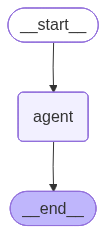

In [2]:
# Create Workflow

xai_agent = experiment_utils.create_xai_agent(
    agent_type="react_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_agent_config = {
    "configurable": {
        "thread_id": xai_agent["id"],
    },
    "recursion_limit": 30,
}
xai_react_rag_agent = container.react_rag_agent()
xai_workflow = xai_react_rag_agent.get_workflow(xai_agent["id"],schema="public")

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The query "What is the pinnacle of excellence?" is abstract and philosophical. It appears to seek a definition, explanation, or insightful perspective on what represents the highest level of excellence. The user might be looking for a metaphorical, inspirational, or conceptual answer rather than a literal one, as "pinnacle" implies a peak or summit. There's no specific context (empty), and no previous messages, so I should provide a balanced, thoughtful response without assuming prior conversation.

2. Think about the solution: This isn't a factual or closed-ended question, so I don't need external tools. I can draw from general knowledge in philosophy, psychology, or common wisdom. Possible interpretations include excellence being self-referential (excellence is its own pinnacle), achieving mastery, or striving for perfection. To make it engaging, I could reference ideas like Aristotle's concept of eudaimonia (flourishing) or modern views on personal growth. Keep it concise, positive, and insightful.

3. Resolve the task with the tools at your disposal: No tools are required since this is opinion-based. Formulate a response that's helpful, clear, and directly addresses the query.

4. Verify if the solution addresses the user intent properly: The response should define or explore "pinnacle of excellence" in a way that's meaningful and not misleading. It should encourage reflection without being overly vague.
</thinking>

<response>The pinnacle of excellence is often considered the ultimate achievement of one's full potential, where skill, dedication, and mastery converge. In philosophy, thinkers like Aristotle described it as eudaimonia—living virtuously and flourishing in one's pursuits. Ultimately, it might be subjective: for some, it's reaching the top of their field; for others, it's the continuous journey of self-improvement. What does it mean to you?</response>

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [6]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The user is asking to repeat their previous question ("What is the pinnacle of excellence?") and my previous answer in Dutch, using a maximum of ten sentences. This is a request for translation and repetition, likely for clarity or preference. Intent is straightforward: provide the Q&A in Dutch, concisely.

2. Think about the solution: I need to translate the original query and my response accurately into Dutch. Original query: "What is the pinnacle of excellence?" Original response: A 4-sentence paragraph. Structure the reply as: State the previous question in Dutch, then the answer in Dutch, ensuring the total is no more than 10 sentences (aim for brevity). Use natural Dutch phrasing.

3. Resolve the task with the tools at your disposal: No tools needed; perform the translation mentally. Keep it under 10 sentences: Perhaps 1 for the question, and the rest for the answer broken into sentences.

4. Verify if the solution addresses the user intent properly: The response should clearly repeat the Q&A in Dutch, stay within 10 sentences, and be faithful to the originals.
</thinking>

<response>Uw vorige vraag was: "Wat is de pinnacle van excellentie?"  
Mijn antwoord was: De pinnacle van excellentie wordt vaak beschouwd als de ultieme verwezenlijking van iemands volledige potentieel, waar vaardigheid, toewijding en meesterschap samenkomen.  
In de filosofie beschreven denkers zoals Aristoteles het als eudaimonia—levend leven volgens de deugd en bloeien in je bezigheden.  
Uiteindelijk kan het subjectief zijn: voor sommigen is het de top bereiken in hun vakgebied; voor anderen is het de voortdurende reis van zelfverbetering.  
Wat betekent het voor jou?</response>

---
### Anthropic ReACT RAG Agent

In [7]:
# Create Workflow

anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="react_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_agent_config = {
    "configurable": {
        "thread_id": anthropic_agent["id"],
    },
    "recursion_limit": 30,
}
anthropic_react_rag_agent = container.react_rag_agent()
anthropic_workflow = anthropic_react_rag_agent.get_workflow(anthropic_agent["id"],schema="public")

In [8]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [9]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking about "the pinnacle of excellence," which is a philosophical and subjective question. This could be interpreted in several ways:

1. They might be asking for a general definition of what represents the highest level of excellence
2. They could be seeking examples of excellence in various fields
3. They might want a philosophical perspective on what constitutes ultimate achievement or mastery
4. This could be a metaphorical question about ideals and aspirations

Since there's no specific context provided and no previous conversation history, I should provide a thoughtful, comprehensive answer that addresses the concept of excellence at its highest form. I'll focus on the universal principles that define peak excellence while acknowledging that it can manifest differently across domains.

The question seems to seek understanding of what represents the absolute best or highest standard of achievement, so I should cover both the characteristics of excellence and perhaps some examples or frameworks for understanding it.
</thinking>

<response>
The pinnacle of excellence represents the highest possible standard of achievement, mastery, and quality in any given domain. It embodies several key characteristics:

**Mastery and Skill**: True excellence requires deep expertise developed through deliberate practice, continuous learning, and refinement over time. It goes beyond mere competence to achieve an almost effortless fluency in one's craft.

**Innovation and Creativity**: The pinnacle often involves pushing boundaries, creating something new, or approaching challenges in ways others haven't considered. It's not just about doing things well, but about elevating the entire field or discipline.

**Consistency and Reliability**: Excellence isn't a one-time achievement but a sustained standard. It involves delivering exceptional results repeatedly, even under pressure or changing circumstances.

**Purpose and Impact**: The highest forms of excellence often serve something greater than oneself, whether that's advancing human knowledge, inspiring others, solving important problems, or creating lasting value.

**Continuous Growth**: Paradoxically, those who achieve the pinnacle of excellence rarely consider themselves "finished." They maintain a beginner's mind and continue seeking improvement and deeper understanding.

Examples might include artistic masterpieces that transcend their time, scientific breakthroughs that reshape our understanding, acts of leadership that inspire generations, or craftsmanship so refined it becomes art.

Ultimately, the pinnacle of excellence is both a destination and a journey—representing the highest achievement possible while embodying the relentless pursuit of something even greater.
</response>

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking me to repeat my previous question and answer in Dutch, using a maximum of ten sentences. Let me break this down:

1. The user's previous question was "What is the pinnacle of excellence?"
2. My previous answer was a comprehensive explanation about excellence at its highest form
3. Now they want both the question and answer repeated in Dutch
4. I need to limit it to maximum ten sentences
5. I need to translate and condense my previous response while maintaining the key points

I should:
- First state their previous question in Dutch
- Then provide a condensed version of my answer in Dutch
- Make sure to stay within the ten sentence limit
- Maintain the essential meaning while being concise
</thinking>

<response>
Je vorige vraag was: "Wat is het toppunt van excellentie?"

Het toppunt van excellentie vertegenwoordigt de hoogst mogelijke standaard van prestatie, meesterschap en kwaliteit in elk domein. Het vereist diepe expertise die ontwikkeld wordt door bewuste oefening en voortdurend leren. Ware excellentie gaat verder dan competentie en bereikt een bijna moeiteloze vloeiendheid in je vak.

Het houdt ook innovatie en creativiteit in - het doorbreken van grenzen en het creëren van iets nieuws. Excellentie is geen eenmalige prestatie maar een volgehouden standaard van uitzonderlijke resultaten. De hoogste vormen van excellentie dienen vaak iets groters dan jezelf, zoals het bevorderen van menselijke kennis of het inspireren van anderen.

Paradoxaal genoeg beschouwen zij die excellentie bereiken zichzelf zelden als "klaar" - ze blijven groeien en verbetering zoeken. Uiteindelijk is het toppunt van excellentie zowel een bestemming als een reis: de hoogst mogelijke prestatie bereiken terwijl je het meedogenloze streven naar iets nog groters belichaamt.
</response>

---
### Ollama ReACT RAG Agent

In [22]:
# Create Workflow

ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag", llm_tag="gemma3:12b",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT"),
)
ollama_agent_config = {
    "configurable": {
        "thread_id": ollama_agent["id"],
    },
    "recursion_limit": 30,
}
ollama_react_rag_agent = container.react_rag_agent()
ollama_workflow = ollama_react_rag_agent.get_workflow(ollama_agent["id"],schema="public")

In [23]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [24]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>The question "What is the pinnacle of excellence?" is philosophical and open to interpretation. There's no single, universally agreed-upon answer. The best approach is to acknowledge this and offer several perspectives, highlighting that "excellence" itself is a complex concept. I will structure my response to address potential interpretations, such as artistic, scientific, moral, or personal excellence, providing examples to illustrate each. I will avoid claiming any single answer as *the* pinnacle.</thinking>
<response>
Defining the "pinnacle of excellence" is incredibly difficult because excellence itself is subjective and manifests differently across various fields. There isn't one definitive answer. However, we can explore some possibilities and what qualities might represent the highest achievements in different domains.

Here are a few perspectives:

*   **Artistic Excellence:** This could be considered the creation of work that profoundly resonates with humanity, transcending cultural and temporal boundaries. Think of Shakespeare's plays, which continue to be relevant centuries later, or the enduring beauty of a Bach composition. It's not merely technical skill, but the ability to evoke deep emotions and understanding.
*   **Scientific Excellence:** Here, it might be a discovery that fundamentally alters our understanding of the universe or significantly improves human lives. Examples could include the development of vaccines to eradicate diseases, the formulation of the theory of relativity, or breakthroughs in understanding genetics. It combines rigorous methodology with groundbreaking insight.
*   **Moral/Ethical Excellence:**  This involves consistently acting with integrity, compassion, and a commitment to justice, even in the face of adversity. Nelson Mandela’s unwavering fight against apartheid, despite immense personal cost, could be considered an example of moral excellence.
*   **Personal Excellence:** This is perhaps the most individualistic definition. It involves striving to reach one's full potential in all areas of life – intellectual, emotional, physical, and spiritual – and living a life aligned with one's values. What constitutes "personal excellence" is unique to each individual.
*   **Innovation and Problem Solving:** In the modern era, excellence might be found in the ability to solve incredibly complex problems, often through innovative approaches. Think of the teams involved in creating artificial intelligence or developing sustainable energy solutions.

Ultimately, the "pinnacle of excellence" is likely a combination of these qualities – a rare achievement that combines skill, creativity, ethical conduct, and a lasting positive impact on the world. What one person considers the pinnacle, another might not. It's a constantly evolving ideal.</response>

In [25]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [26]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>The user wants me to repeat the previous question and my answer in Dutch, limited to ten sentences. I need to translate both the question and the previous response accurately, keeping within the sentence limit. I will prioritize clarity and conciseness.</thinking>
<response>
<response>
Je vorige vraag was: "Wat is het toppunt van uitmuntendheid?" Mijn antwoord was dat dit een lastige, filosofische vraag is zonder één definitief antwoord. Uitmuntendheid is namelijk subjectief en verschilt per vakgebied. Denk aan kunst, wetenschap, moraliteit of persoonlijke groei; elk gebied heeft zijn eigen toppunt. Voorbeelden zijn Shakespeares toneelstukken, de ontdekking van vaccins of het leven van Nelson Mandela. Het gaat om een combinatie van vaardigheid, creativiteit, ethisch gedrag en een blijvende positieve impact. Wat de één uitmuntendheid noemt, kan de ander anders zien.  Het is een voortdurend evoluerend ideaal. Kortom, het toppunt van uitmuntendheid is moeilijk te bepalen, maar altijd inspirerend om naar te streven.</response>

---
### OpenAI ReACT RAG Agent

In [17]:
# Create Workflow

openai_agent = experiment_utils.create_openai_agent(
    agent_type="react_rag", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_agent_config = {
    "configurable": {
        "thread_id": openai_agent["id"],
    },
    "recursion_limit": 30,
}
openai_react_rag_agent = container.react_rag_agent()
openai_workflow = openai_react_rag_agent.get_workflow(openai_agent["id"],schema="public")

In [18]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [19]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>I'm providing a concise, thoughtful answer without exposing internal step-by-step reasoning.</thinking>
<response>
There isn’t a single universal pinnacle of excellence. It’s a moving target defined by context, standards, and what you value. In many view, the pinnacle sits at the intersection of three elements:

- Mastery: deep skill, consistent high performance, and ongoing improvement.
- Integrity: ethical conduct, honesty, accountability.
- Impact: meaningful, positive outcomes for others or the field.

Practically, you can approach it by:
- Clarifying your purpose and the domain’s standards.
- Defining explicit, measurable criteria for exceptional work (quality, efficiency, innovation, reliability).
- Building disciplined practice, seeking feedback, and learning from mistakes.
- Balancing ambition with humility and a sense of responsibility to others.

In short, the pinnacle of excellence is not a fixed point but a sustained, value-aligned pursuit of remarkable performance that serves something larger than oneself.

In [20]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [21]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>Ik geef de vorige vraag en mijn antwoord in het Nederlands weer, binnen tien zinnen zoals gevraagd.</thinking>
<response>
Vraag: Wat is het toppunt van uitmuntendheid?
Antwoord: Er is niet één universeel toppunt van uitmuntendheid; het is een bewegend doel dat afhangt van context, normen en wat je waardeert.
Naar mijn opvatting ligt het toppunt op het kruispunt van drie elementen: meesterschap, integriteit en impact.
Meesterschap betekent diepe vaardigheid, consistente hoge prestaties en voortdurende verbetering.
Integriteit betekent ethisch handelen, eerlijkheid en verantwoordelijkheid.
Impact betekent zinvolle, positieve uitkomsten voor anderen of het vakgebied.
Praktisch kun je het benaderen door doelen en normen van het domein te verduidelijken en duidelijke, meetbare criteria voor uitzonderlijk werk vast te stellen.
Verder bouw je aan gedisciplineerde oefening, zoek je feedback en leer je van fouten.
Kortom, het toppunt van uitmuntendheid is geen vast punt maar een voortdurende, waarde-gebonden zoektocht naar uitzonderlijke prestaties die een groter doel dienen.
</response>